In [2]:
import pandas as pd
import chardet


with open('twitter_training.csv', 'rb') as file:
    result = chardet.detect(file.read(10000)) 

encoding = result['encoding']
print(f"Detected encoding: {encoding}")


try:
    data = pd.read_csv('twitter_training.csv', encoding=encoding)
except UnicodeDecodeError:
    try:
        data = pd.read_csv('twitter_training.csv', encoding='ISO-8859-1')
    except UnicodeDecodeError:
        data = pd.read_csv('twitter_training.csv', encoding='cp1252')


data

Detected encoding: utf-8


,ID,Game,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [3]:
data.isnull().sum()

ID             0
Game           0
Sentiment      0
Text         686
dtype: int64

In [4]:
cleaned = data.dropna()
cleaned

,ID,Game,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [5]:
cleaned.drop_duplicates()

,ID,Game,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [6]:
cleaned.head()

,ID,Game,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [7]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73996 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         73996 non-null  int64 
 1   Game       73996 non-null  object
 2   Sentiment  73996 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [8]:
cleaned.describe()

,ID
count,73996.000000
mean,6430.279231
std,3737.660027
min,1.000000
25%,3194.000000
50%,6417.500000
75%,9595.000000
max,13200.000000


In [9]:
print(cleaned['Sentiment'].value_counts())

Sentiment
Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64


### Analysis of sentiment distribution


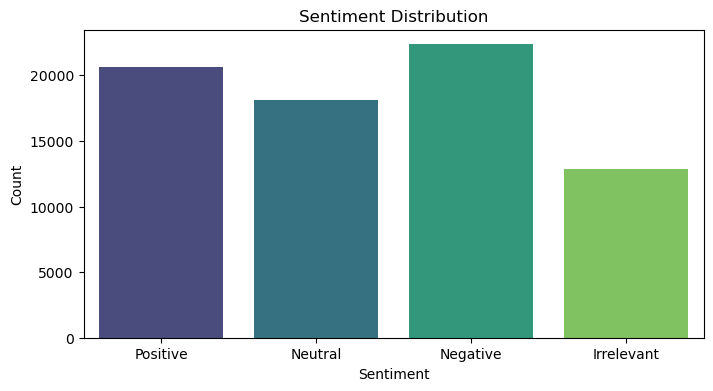

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.countplot(x='Sentiment', data= cleaned, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

### Analysis of sentiments by game

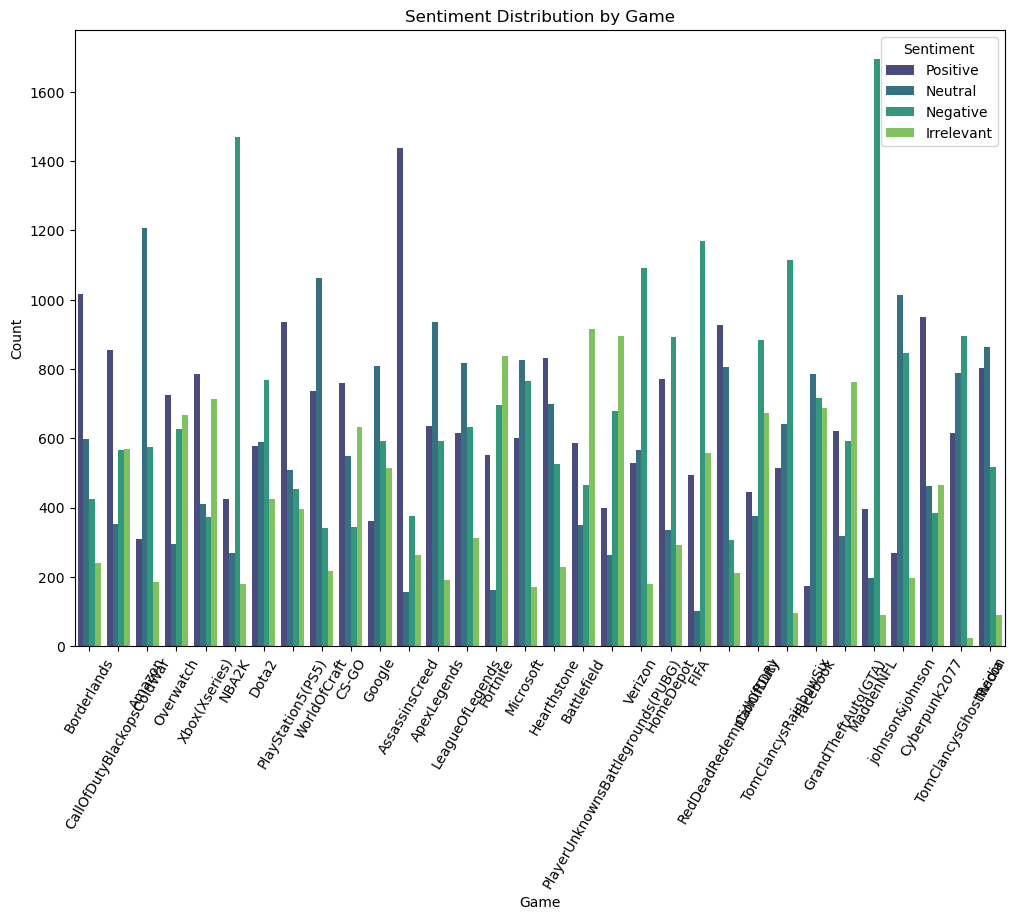

In [11]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Game', hue='Sentiment', data= cleaned, palette='viridis')
plt.title('Sentiment Distribution by Game')
plt.xlabel('Game')
plt.ylabel('Count')
plt.xticks(rotation= 60)
plt.show()


### Sentiments counts for each game

<Figure size 1400x800 with 0 Axes>

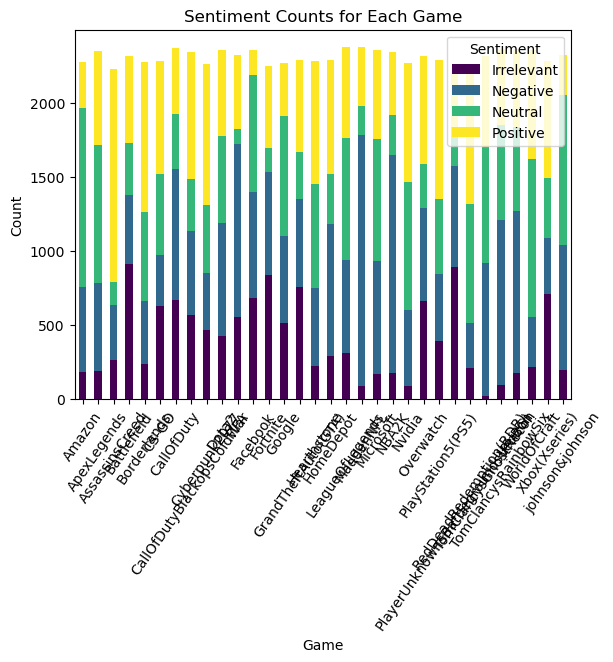

In [12]:
sentiment_by_game = cleaned.groupby('Game')['Sentiment'].value_counts().unstack()

plt.figure(figsize=(14, 8))
sentiment_by_game.plot(kind='bar', stacked= True, colormap='viridis')
plt.title('Sentiment Counts for Each Game')
plt.xlabel('Game')
plt.ylabel('Count')
plt.xticks(rotation= 55)
plt.show()

### Sentiments for specific games


Index(['ID', 'Game', 'Sentiment', 'Text'], dtype='object')
['Borderlands' 'CallOfDutyBlackopsColdWar' 'Amazon' 'Overwatch'
 'Xbox(Xseries)' 'NBA2K' 'Dota2' 'PlayStation5(PS5)' 'WorldOfCraft'
 'CS-GO' 'Google' 'AssassinsCreed' 'ApexLegends' 'LeagueOfLegends'
 'Fortnite' 'Microsoft' 'Hearthstone' 'Battlefield'
 'PlayerUnknownsBattlegrounds(PUBG)' 'Verizon' 'HomeDepot' 'FIFA'
 'RedDeadRedemption(RDR)' 'CallOfDuty' 'TomClancysRainbowSix' 'Facebook'
 'GrandTheftAuto(GTA)' 'MaddenNFL' 'johnson&johnson' 'Cyberpunk2077'
 'TomClancysGhostRecon' 'Nvidia']
['Positive' 'Neutral' 'Negative' 'Irrelevant']


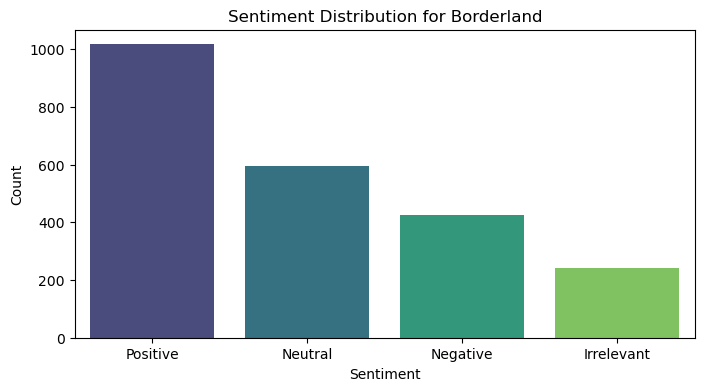

In [13]:
print(cleaned.columns)
print(cleaned['Game'].unique()) 
print(cleaned['Sentiment'].unique())  
game_A = cleaned[cleaned['Game'] == 'Borderlands']
plt.figure(figsize=(8, 4))
sns.countplot(x='Sentiment', data=game_A, palette='viridis')  
plt.title('Sentiment Distribution for Borderland')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

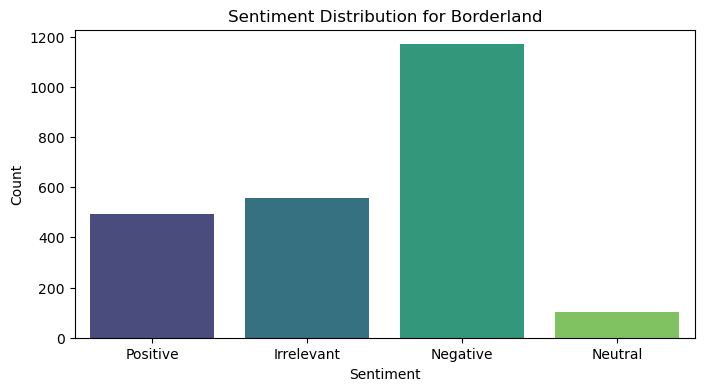

In [14]:
game_A = cleaned[cleaned['Game'] == 'FIFA']


plt.figure(figsize=(8, 4))
sns.countplot(x='Sentiment', data=game_A, palette='viridis')  
plt.title('Sentiment Distribution for Borderland')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

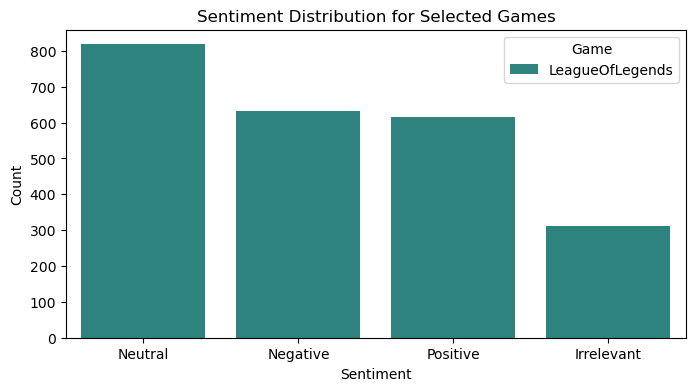

In [15]:
selected_games = cleaned[cleaned['Game'].isin(['Borderland', 'Fallout', 'LeagueOfLegends'])]

plt.figure(figsize=(8, 4))
sns.countplot(x='Sentiment', hue='Game', data= selected_games, palette='viridis')
plt.title('Sentiment Distribution for Selected Games')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [31]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob


nltk.download('vader_lexicon')


data = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'game': ['Borderland', 'Fortnite', 'Apex Legends', 'Borderland'],
    'sentiments': ['positive', 'negative', 'neutral', 'positive'],
    'text': ['I love this game!', 'This game is terrible.', 'It’s okay, not great.', 'Amazing gameplay experience.']
})

sia = SentimentIntensityAnalyzer()


data['text'] = data['text'].astype(str)

data['Polarity'] = data['text'].apply(lambda text: sia.polarity_scores(text)['compound'])
data['Sentiment_Analysis'] = data['Polarity'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))


data['Polarity_TextBlob'] = data['text'].apply(lambda text: TextBlob(text).sentiment.polarity)
data['Subjectivity_TextBlob'] = data['text'].apply(lambda text: TextBlob(text).sentiment.subjectivity)
data['Sentiment_TextBlob'] = data['Polarity_TextBlob'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))


print(data[['id', 'game', 'text', 'Polarity', 'Sentiment_Analysis', 'Polarity_TextBlob', 'Subjectivity_TextBlob', 'Sentiment_TextBlob']])


   id          game                          text  Polarity  \
0   1    Borderland             I love this game!    0.6696   
1   2      Fortnite        This game is terrible.   -0.4767   
2   3  Apex Legends         It’s okay, not great.   -0.3387   
3   4    Borderland  Amazing gameplay experience.    0.5859   

  Sentiment_Analysis  Polarity_TextBlob  Subjectivity_TextBlob  \
0           positive               0.00                  0.500   
1           negative              -0.70                  0.700   
2           negative               0.05                  0.625   
3           positive               0.60                  0.900   

  Sentiment_TextBlob  
0            neutral  
1           negative  
2           positive  
3           positive  


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
